In [1]:
import time
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 경고제거
import warnings
warnings.filterwarnings( 'ignore' )

# Data source : https://grouplens.org/datasets/movielens/

In [14]:
rating_file_path = '../data/ratings.dat'
movie_file_path ='../data/movies.dat'
user_file_path ='../data/users.dat'

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                    names =['user_id','movie_id','rating',
                                            'time'],delimiter='::')
movie_data = pd.io.parsers.read_csv(movie_file_path,
                                    names =['movie_id','title','genre']
                                     ,delimiter='::')
user_data = pd.io.parsers.read_csv(user_file_path,
                                    names =['user_id','genre','age','occupation',
                                            'zipcode'],delimiter='::')


In [15]:
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [16]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
user_data.head()

,user_id,genre,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


# 분석할 영화의 정보 탐색

In [18]:
# 총 영화의 개수를 출력
print('total number of movie in data',len(movie_data['movie_id'].unique()))


total number of movie in data 3883


In [19]:
# 연도별 영화 개수가 많은 Top10 연도를 출력
movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1])
movie_data['year'].value_counts().head(10)

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

# 장르의 속성탐색하기

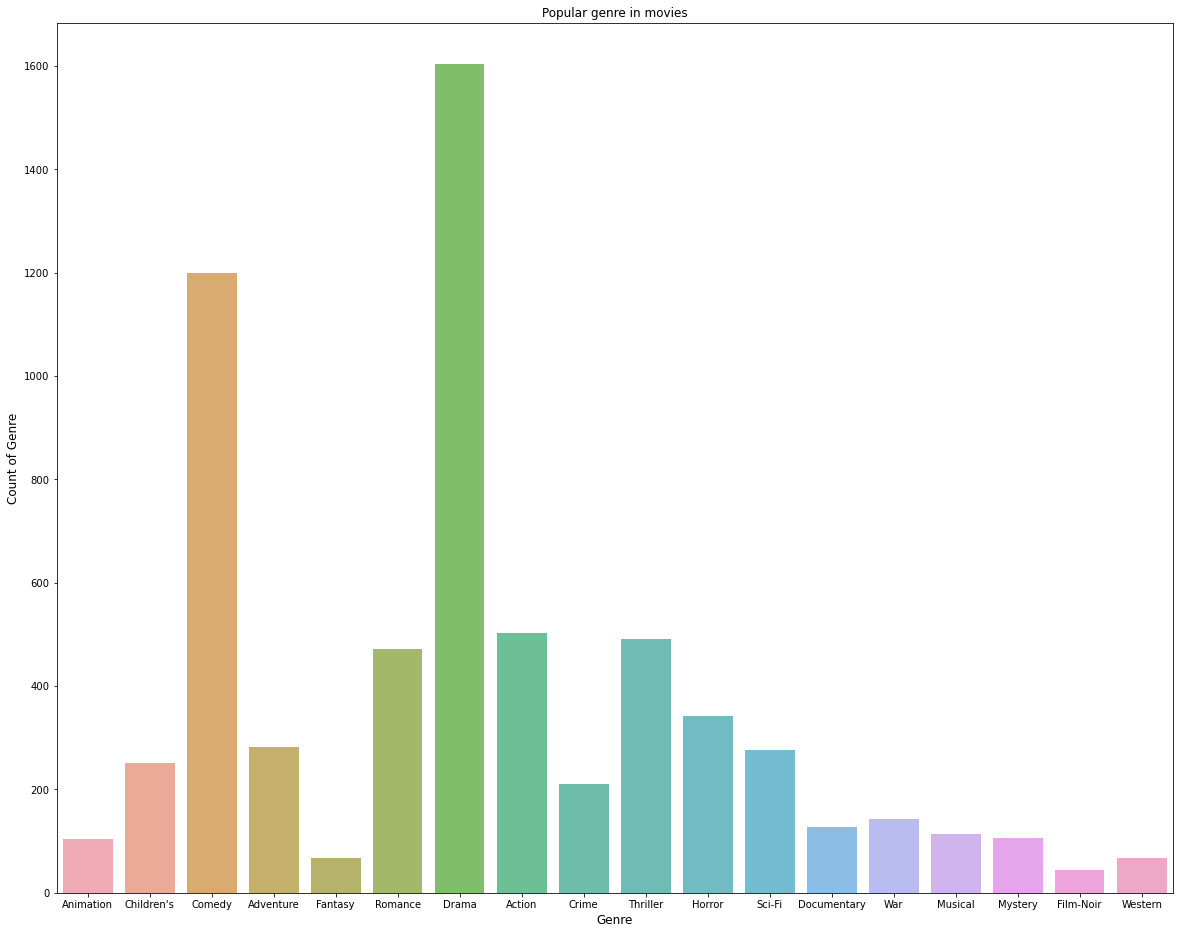

In [21]:
# 가장 많이 등장한 장르의 속성을 추출
unique_genre_dict = {}
for index, row in movie_data.iterrows():
    
    # genre 피처를 ‘|’ 구분자로 분리합니다.
    genre_combination = row['genre']
    parsed_genre = genre_combination.split("|")
    
    # 구분자로 분리한 장르의 속성을 unique_genre_dict에 각각 계산하여 저장합니다.
    for genre in parsed_genre:
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else:
            unique_genre_dict[genre] = 1
            
# unique_genre_dict 를 이용하여 장르의 속성을 그래프로 출력

plt.rcParams['figure.figsize'] = [20, 16]
sns.barplot(list(unique_genre_dict.keys()), list(unique_genre_dict.values()), alpha=0.8)
plt.title('Popular genre in movies')
plt.ylabel('Count of Genre', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.show()

# 유저의 수를 탐색


In [22]:
print('total number of user in data :',len(user_data['user_id'].unique()))

total number of user in data : 6040


# 각 영화가 평가 받은 횟수를 탐색

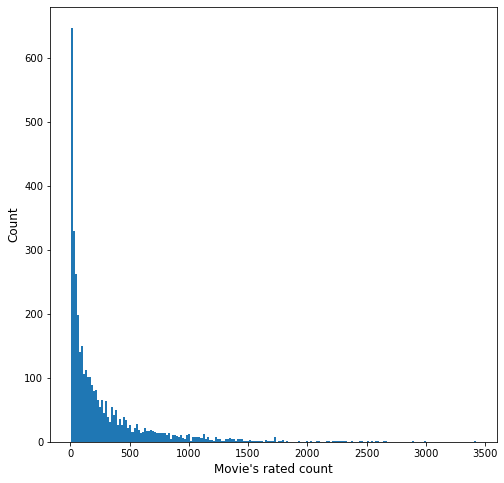

total number of movie in data : 3883
total number of movie rated below 100: 1687


In [26]:
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values
plt.rcParams['figure.figsize']=[8,8]
fig = plt.hist(movie_rate_count,bins=200)

plt.ylabel('Count',fontsize =12)
plt.xlabel("Movie's rated count",fontsize=12)
plt.show()

print('total number of movie in data :',
      len(movie_data['movie_id'].unique()))
print('total number of movie rated below 100:',
      len(movie_rate_count[movie_rate_count<100]))

# 영화별 평균 평점 탐색

In [54]:
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg({'rated_count':'count',
                                                                           'rating_mean':'mean'})


movie_grouped_rating_info['rating_mean'].hist(bins=150,grid=False)

SpecificationError: nested renamer is not supported

In [49]:
# # 영화별 평균 평점을 탐색합니다.
# movie_grouped_rating_info = rating_data.groupby("movie_id")['rating'].agg(['count','mean'])
# movie_grouped_rating_info.columns = ['rated_count', 'rating_mean']

# user-movie 형태로 살펴보기


In [55]:
# unstack()함수로 user_id, movie_id를 축으로 하는 데이터를 생성
rating_table = rating_data[['user_id',
                            'movie_id',
                            'rating']].set_index(['user_id',
                                                  'movie_id']).unstack()
rating_table.head()


rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 3706 columns]

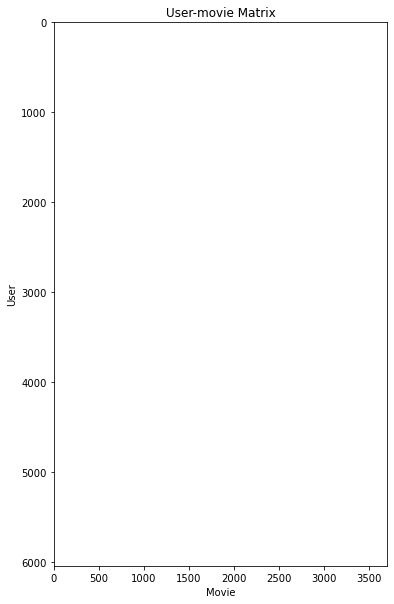

In [53]:
# user_movie 표를 시각화
plt.rcParams['figure.figsize']=[10,10]
plt.imshow(rating_table)
plt.grid(False)
plt.xlabel('Movie')
plt.ylabel('User')
plt.title('User-movie Matrix')
plt.show()

In [62]:
# MovieLens 데이터에 SVD 적용하기
from surprise import SVD,Dataset,Reader,accuracy
from surprise.model_selection import train_test_split

In [65]:
# SVD 라이브러리를 사용하기 위한 삭습 데이터 생성
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[['user_id','movie_id','rating']],reader)
train_data = data.build_full_trainset()

In [66]:
# SVD 모델을 학습( z컴퓨터 성능에 따라 1~5분 소용)

train_start = time.time()
model = SVD(n_factors=8,
           lr_all=0.005,
           reg_all=0.02,
           n_epochs=100)

model.fit(train_data)
train_end = time.time()
print('training time of model:%.2f seconds'%(train_end-train_start))

training time of model:60.22 seconds


# 영화 점수를 예측할 타겟 유저 선정

In [72]:
# user_id가 4인 유저의 영화 평가 데이터

target_user_id = 4

target_user_data = rating_data[rating_data['user_id']==target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [108]:
# user_id 4인 유저가 평가 한 영화 히스토리 정보를 추출

target_user_movie_rating_dict = {}

for index,row in target_user_data.iterrows():
    movie_id = row['movie_id']
    target_user_movie_rating_dict[movie_id]=row['rating']
    
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [109]:
# 타겟 유저(user_id가 4인 유저)가 보지 않은 영화 정보를 테스트 데이터로 생성합니다.
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))

    # 타겟 유저의 평점 점수를 예측합니다.
target_user_predictions = model.test(test_data)

# 예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict_dict로 저장합니다.
def get_user_predicted_ratings(predictions, user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions, 
                                                            user_id=target_user_id, 
                                                            user_history=target_user_movie_rating_dict)

In [110]:
# target_user_movie_predict_dict에서 예측된 점수 중, 타겟 유저의 Top 10 영화를 선정합니다.
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(), 
                                     key=operator.itemgetter(1), reverse=True)[:10]

In [111]:
# 예측된 Top 10 영화
target_user_top10_predicted

[(111, 5),
 (199, 5),
 (246, 5),
 (326, 5),
 (501, 5),
 (527, 5),
 (608, 5),
 (669, 5),
 (750, 5),
 (787, 5)]